In [10]:
import arviz as az
import numpy as np

In [11]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

The flight network topology is given by four airports A1, A2, A3, A4. Engine one flies between A1 and A2. Engine two flies between A3 and A4

In [12]:
# True parameter values
a, b, c, d, e, f, g, h = 0.7, 0.3, 0.4, 0.6, 0.1, 0.9, 0.9, 0.1
a1 = [a,b]
a2 = [c,d]
a3 = [e,f]
a4 = [g,h]

k1 = 0.5 * a + 0.5 * c
k2 = 0.5 * b + 0.5 * d
k3 = 0.5 * e + 0.5 * g
k4 = 0.5 * f + 0.5 * h

print(k1, k2, k3, k4)


0.55 0.44999999999999996 0.5 0.5


In [13]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.15.1


In [14]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha1 = pm.Uniform("alpha1", lower=[1,1], upper=[10,10])
    alpha2 = pm.Uniform("alpha2", lower=[1,1], upper=[10,10])
    alpha3 = pm.Uniform("alpha3", lower=[1,1], upper=[10,10])
    alpha4 = pm.Uniform("alpha4", lower=[1,1], upper=[10,10])
    a1 = pm.Dirichlet("a1", a=alpha1)
    a2 = pm.Dirichlet("a2", a=alpha2)
    a3 = pm.Dirichlet("a3", a=alpha3)
    a4 = pm.Dirichlet("a4", a=alpha4)
    sigma = 0.01

    # Expected value of outcome
    mu_e1_1 = 0.5 * a1[0] + 0.5 * a2[0]
    mu_e1_2 = 0.5 * a1[1] + 0.5 * a2[1]
    mu_e2_1 = 0.5 * a3[0] + 0.5 * a4[0]
    mu_e2_2 = 0.5 * a3[1] + 0.5 * a4[1]

      
    # Likelihood (sampling distribution) of observations
    e1_obs_1 = pm.Normal("e1_obs_1", mu=mu_e1_1, sigma=sigma, observed=k1)
    e1_obs_2 = pm.Normal("e1_obs_2", mu=mu_e1_2, sigma=sigma, observed=k2)
    e2_obs_1 = pm.Normal("e2_obs_1", mu=mu_e2_1, sigma=sigma, observed=k3)
    e2_obs_2 = pm.Normal("e2_obs_2", mu=mu_e2_2, sigma=sigma, observed=k4)

In [15]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(1000, target_accept=0.85)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha1, alpha2, alpha3, alpha4, a1, a2, a3, a4]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


In [16]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

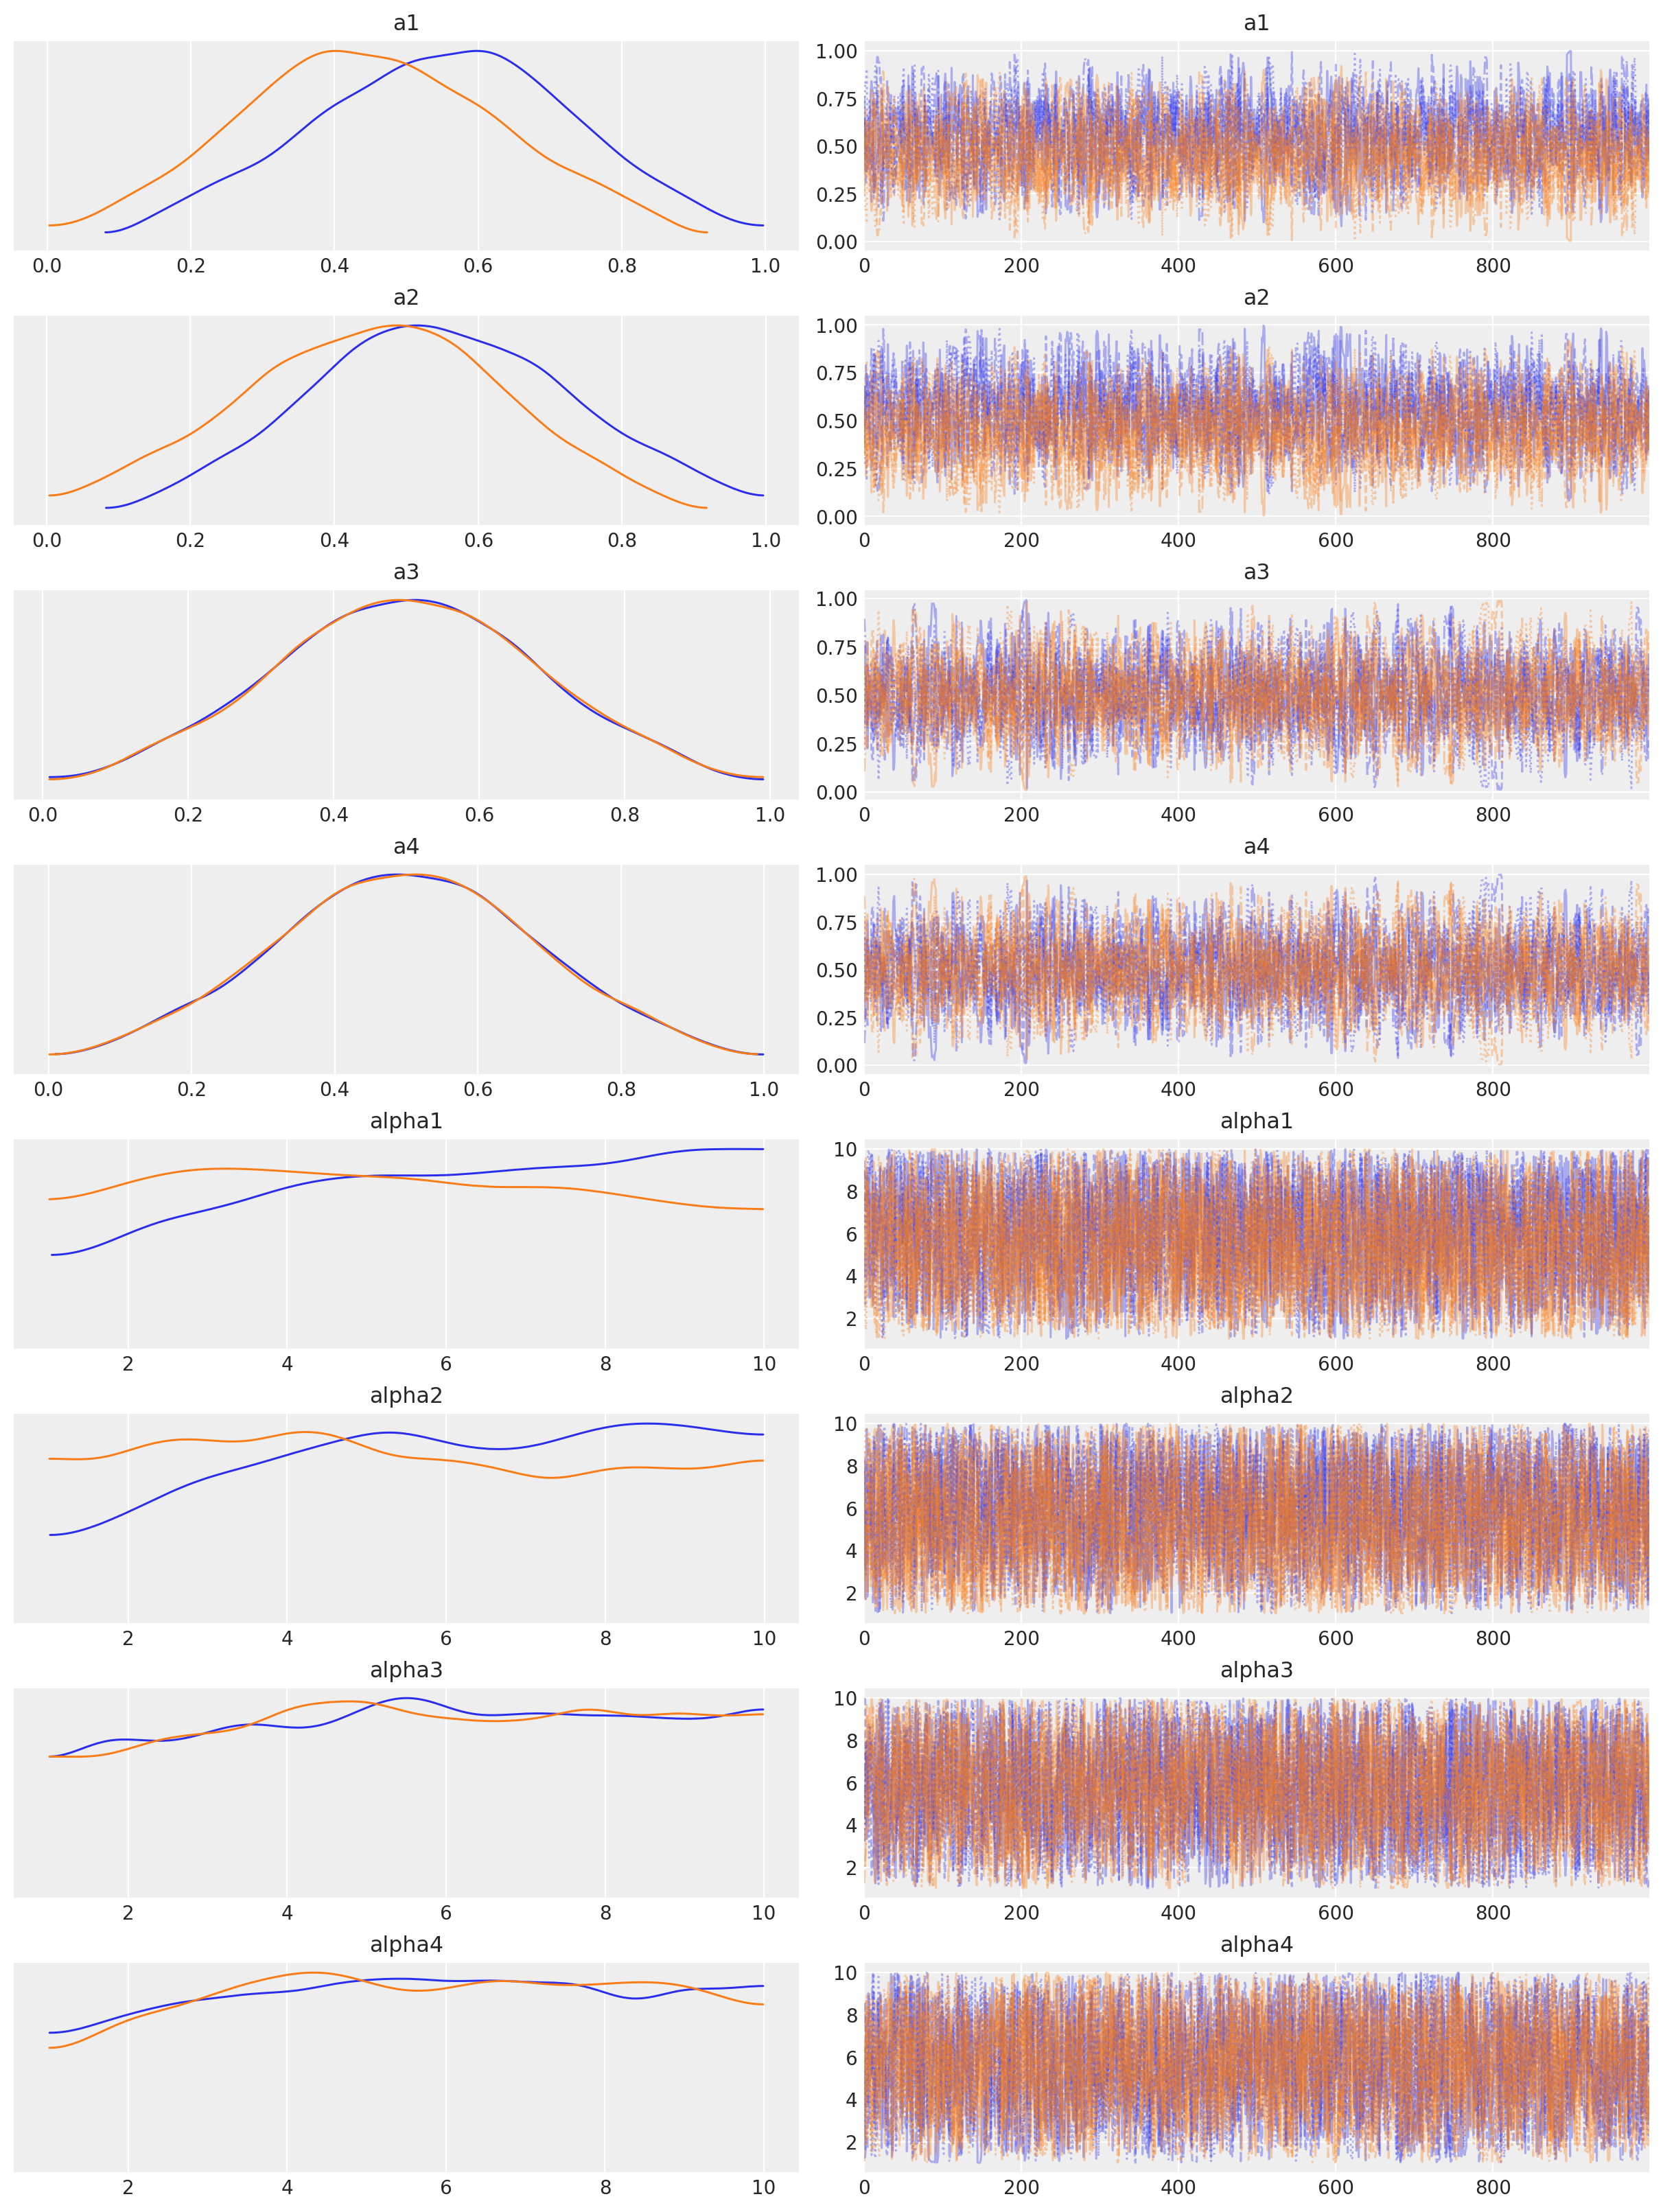

In [17]:
az.plot_trace(idata, combined=True);

In [18]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a1[0]      0.55  0.18    0.21     0.89       0.00     0.00   1416.65   
a1[1]      0.45  0.18    0.11     0.79       0.00     0.00   1416.65   
a2[0]      0.55  0.18    0.21     0.89       0.00     0.00   1397.54   
a2[1]      0.45  0.18    0.11     0.79       0.00     0.00   1397.54   
a3[0]      0.50  0.19    0.15     0.86       0.01     0.00    912.72   
a3[1]      0.50  0.19    0.14     0.85       0.01     0.00    912.72   
a4[0]      0.50  0.19    0.13     0.84       0.01     0.00    903.20   
a4[1]      0.50  0.19    0.16     0.87       0.01     0.00    903.20   
alpha1[0]  6.00  2.47    2.03    10.00       0.05     0.03   2322.28   
alpha1[1]  5.37  2.52    1.08     9.40       0.05     0.03   2660.58   
alpha2[0]  5.97  2.43    2.01     9.99       0.04     0.03   2805.67   
alpha2[1]  5.35  2.57    1.56     9.99       0.06     0.04   2008.67   
alpha3[0]  5.66  2.54    1.63     9.96       0.05     0.04   2187.94   
alpha3[1]  5.66  2.53    1.70     9.98       0.06     0.04   1933.89   
alpha4[0]  5.64  2.52    1.70    10.00       0.06     0.04   1603.16   
alpha4[1]  5.65  2.48    1.71     9.90       0.05     0.04   1822.57   

           ess_tail  r_hat  
a1[0]       1578.02   1.00  
a1[1]       1578.02   1.00  
a2[0]       1702.97   1.00  
a2[1]       1702.97   1.00  
a3[0]       1077.99   1.01  
a3[1]       1077.99   1.01  
a4[0]       1138.85   1.01  
a4[1]       1138.85   1.01  
alpha1[0]   2134.04   1.00  
alpha1[1]   2304.55   1.00  
alpha2[0]   2290.09   1.00  
alpha2[1]   2172.61   1.00  
alpha3[0]   2244.97   1.00  
alpha3[1]   1747.29   1.00  
alpha4[0]   1495.63   1.00  
alpha4[1]   1809.37   1.00